In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
# Load the dataset
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
# Display the first few rows of the dataset
print(data.head(15))

   Order ID Customer Name           Category  ... Discount  Profit       State
0       OD1        Harish       Oil & Masala  ...     0.12  401.28  Tamil Nadu
1       OD2         Sudha          Beverages  ...     0.18  149.80  Tamil Nadu
2       OD3       Hussain        Food Grains  ...     0.21  165.20  Tamil Nadu
3       OD4       Jackson   Fruits & Veggies  ...     0.25   89.60  Tamil Nadu
4       OD5       Ridhesh        Food Grains  ...     0.26  918.45  Tamil Nadu
5       OD6        Adavan        Food Grains  ...     0.26  322.70  Tamil Nadu
6       OD7         Jonas   Fruits & Veggies  ...     0.33  346.92  Tamil Nadu
7       OD8         Hafiz   Fruits & Veggies  ...     0.32  147.76  Tamil Nadu
8       OD9         Hafiz             Bakery  ...     0.23  181.93  Tamil Nadu
9      OD10      Krithika             Bakery  ...     0.27  484.65  Tamil Nadu
10     OD11        Ganesh             Snacks  ...     0.13  437.69  Tamil Nadu
11     OD12         Yadav  Eggs, Meat & Fish  ...   

In [ ]:
# Check for missing values
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
# Convert 'Order Date' to datetime format, forcing invalid entries to NaT
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
# Extract components
data['Day'] = data['Order Date'].dt.day
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

In [ ]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Month'])

In [ ]:
print(data.head())

  Order ID Customer Name  Category  ...  Order Day  Order Month Order Year
0      OD1        Harish         5  ...          8           10       2017
1      OD2         Sudha         1  ...          8           10       2017
2      OD3       Hussain         3  ...         12            5       2017
3      OD4       Jackson         4  ...         11            9       2016
4      OD5       Ridhesh         3  ...         11            9       2016

[5 rows x 14 columns]


/tmp/ipython-input-43-771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


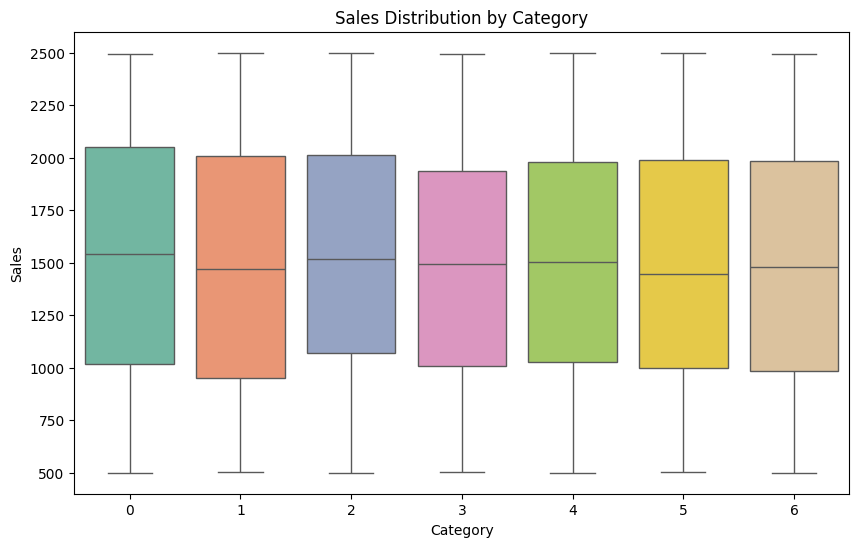

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

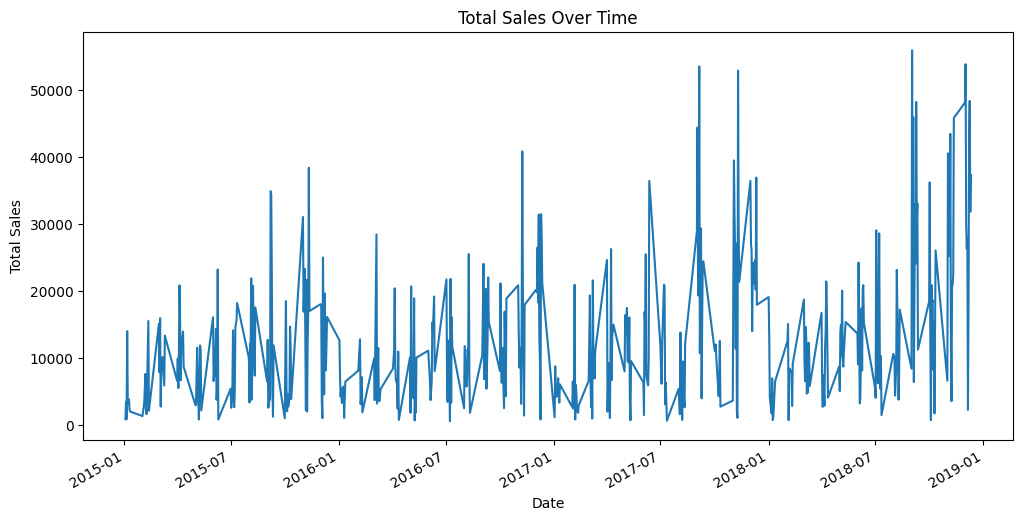

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

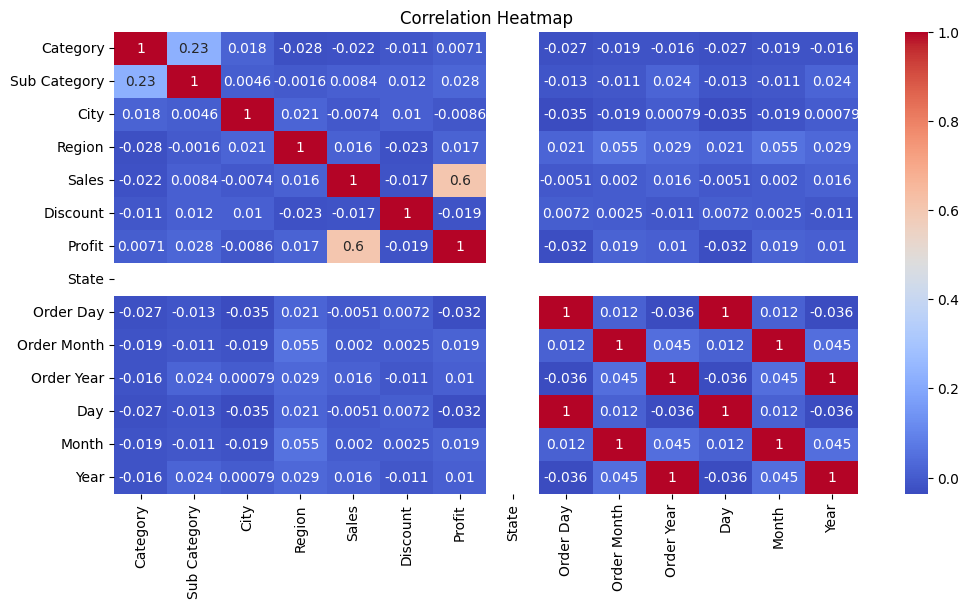

In [ ]:
plt.figure(figsize=(12, 6))
corr_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
 # Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'Sales', 'Month'])
target = data['Sales']
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)
 # Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
 # Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 211380.02160390795
R-squared: 0.3681183035119068


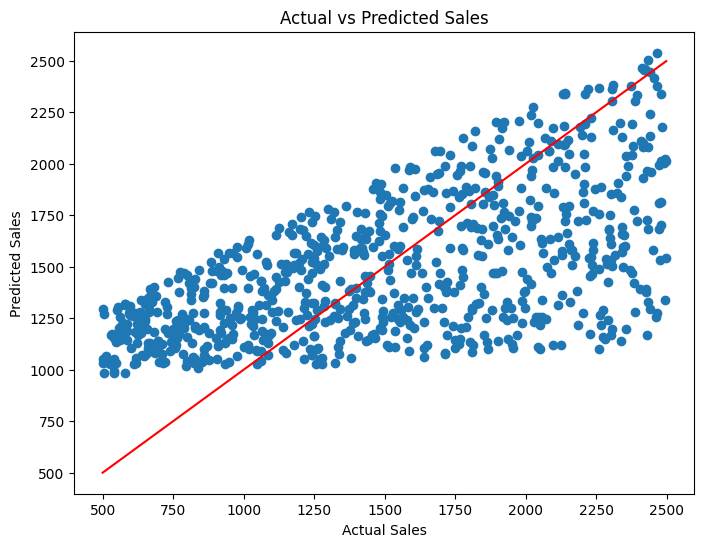

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),
max(y_test)],[min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
  print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


/tmp/ipython-input-17-4006427566.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'ignore')


In [ ]:
da = df.groupby('Category')
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


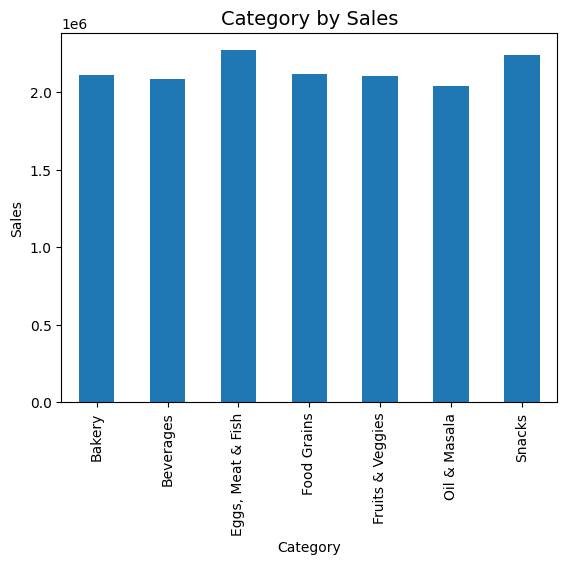

In [ ]:
Sales_category=df.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B')
df['year'] = df['Order Date'].dt.year
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016


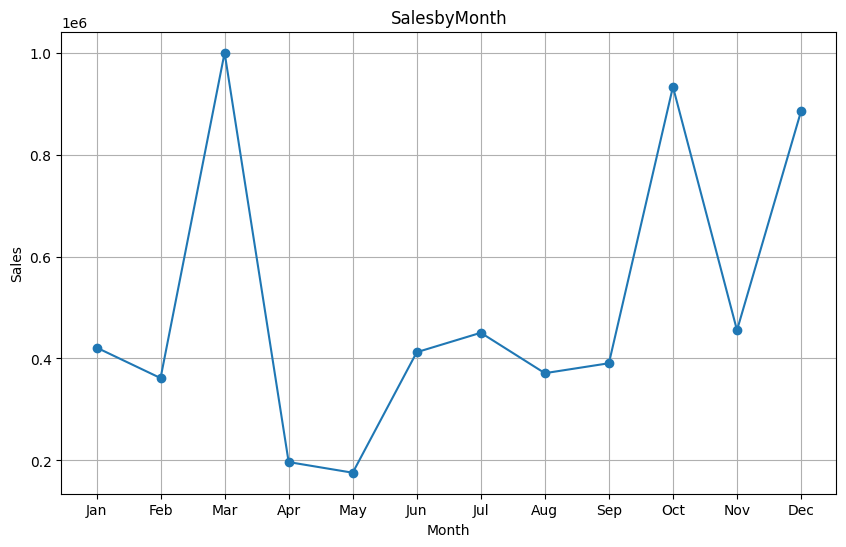

In [ ]:
# Sum up sales by month
monthly_sales=df.groupby('Month')['Sales'].sum().reset_index()
# Sort the data by month
monthly_sales_sorted=monthly_sales.sort_values(by='Month')
# Create the line chart
plt.figure(figsize=(10,6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'],marker='o')
plt.title('SalesbyMonth')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

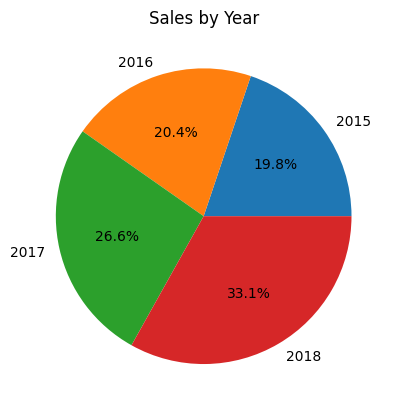

In [ ]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for eachyear
Yearly_Sales=df.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()


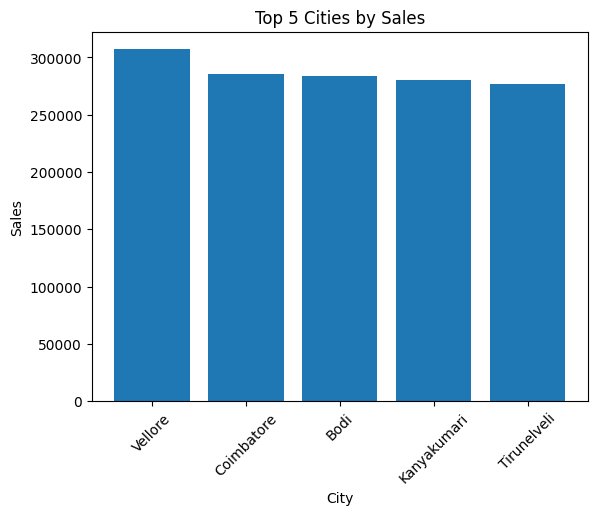

In [ ]:
# Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()